Aproximación de la ecuación por métodos numericos

Método de Euler y Euler Mejorado

  ea_e     ea_em    er_e    er_em  
0.000000 0.000000 0.000000 0.000000
0.062500 0.000762 0.000595 0.000007
0.126525 0.001525 0.001148 0.000014
0.192038 0.002288 0.001662 0.000020
0.259006 0.003052 0.002141 0.000025
0.327395 0.003816 0.002587 0.000030
0.397176 0.004580 0.003003 0.000035
0.468316 0.005344 0.003392 0.000039
0.540789 0.006109 0.003755 0.000042
0.614566 0.006874 0.004095 0.000046
0.689621 0.007640 0.004414 0.000049
0.765929 0.008405 0.004712 0.000052
0.843465 0.009171 0.004991 0.000054
0.922205 0.009937 0.005253 0.000057
1.002128 0.010704 0.005499 0.000059
1.083212 0.011470 0.005729 0.000061
1.165435 0.012237 0.005946 0.000062
1.248777 0.013003 0.006150 0.000064
1.333220 0.013770 0.006341 0.000065
1.418743 0.014538 0.006521 0.000067
1.505329 0.015305 0.006690 0.000068
1.592959 0.016072 0.006850 0.000069
1.681618 0.016840 0.006999 0.000070
1.771289 0.017608 0.007140 0.000071
1.861955 0.018375 0.007273 0.000072
1.953601 0.019143 0.007398 0.000072
2.046212 0.019911 0.007516 0

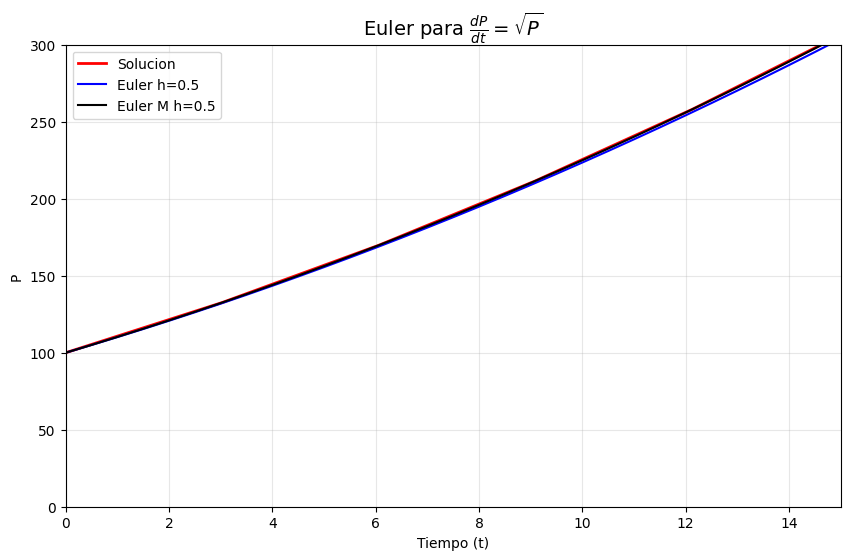

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 1  # constante de crecimiento

# Rango de valores
t = np.linspace(0, 300, 100)   # eje del tiempo
P = np.linspace(0, 300, 100)   # eje P (variable dependiente)

# Ecuación diferencial: dP/dt = k * sqrt(P)
def df_ec(t, P):
    return k * np.sqrt(P)

# Función solución
def function_solved(t, P0):
    return (k*t/2 + np.sqrt(P0))**2
images1 = function_solved(t, 100)

# Parametros
h = 0.5      #distancia entre xn y xn+1
n = 150      #numero de iteraciones

# Metodo de Euler
def Euler(x, y, h, n):
    xs = [x]
    ys = [y]
    while (n > 0):
        xn = xs[-1] + h
        xs.append(xn)
        yn = ys[-1]
        ys.append(yn + h * df_ec(xn, yn))
        n-=1
    return [xs, ys]
euler_result = Euler(0, 100, h, n)
e_values = euler_result[0]
e_images = euler_result[1]

# Metodo de Euler Mejorado
def EulerMejorado(x, y, h, n):
    xs = [x]
    ys = [y]
    while (n > 0):
        xn = xs[-1] + h
        xs.append(xn)
        yn = ys[-1]
        yn1 = yn + h * df_ec(xn, yn)
        ys.append(yn + h * (df_ec(xn, yn) + df_ec(xn + h, yn1))/2)
        n-=1
    return [xs, ys]
eulerm_result = EulerMejorado(0, 100, h, n)
em_values = eulerm_result[0]
em_images = eulerm_result[1]

def Errors(euler, eulerm, xs):
    print("  ea_e  ", "  ea_em  ", " er_e  ", " er_em  ")
    for i in range(len(xs)):
        y = function_solved(xs[i], 100)
        ea_e = np.abs(euler[i] - y)
        er_e = ea_e/y
        ea_em = np.abs(eulerm[i] - y)
        er_em = ea_em/y
        print(f"{ea_e:.6f}", f"{ea_em:.6f}", f"{er_e:.6f}", f"{er_em:.6f}")
Errors(e_images, em_images, e_values)

# Graficar campo de vectores (isoclinas)
plt.figure(figsize=(10, 6))

plt.plot(t, images1,"r-", linewidth=2, label= "Solucion")
plt.plot(e_values, e_images,"b-", linewidth=1.5, label= "Euler h=0.5")
plt.plot(em_values, em_images,"k-", linewidth=1.5, label= "Euler M h=0.5")

plt.title(r'Euler para $\frac{dP}{dt} = \sqrt{P}$', fontsize=14)
plt.xlabel('Tiempo (t)')
plt.ylabel('P')
plt.grid(alpha=0.3)
plt.xlim(0, 15)
plt.ylim(0, 300)
plt.legend()
plt.show()